# Import librairies

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

# Create data

In [2]:
spot_init=100                      #S0 qui est aussi le prix d'exercie
strike = spot_init

int_rate = 2/100                   #Taux d'interet sans risque
volatility=15/100                  #Volatilité historique
maturity=1                         #maturité en année
nb_step=12                         #Décomposition de l'année en mois
time_step = maturity/nb_step       #delta
nb_path=20                         #Nombre de trajectoires
nb_seed=20191008

In [3]:
drift_mod = (int_rate-0.5*volatility**2)*time_step
mat_drift = drift_mod*np.cumsum(np.ones((nb_path,nb_step)),axis=1)

In [4]:
volat_mod = volatility*np.sqrt(time_step)

In [5]:
np.random.seed(nb_seed)

In [6]:
mat_shock = np.random.standard_normal((nb_path,nb_step))

In [7]:
mat_shock_cum = np.cumsum(mat_shock,axis=1)

In [8]:
mat_volatility = volat_mod*mat_shock_cum

In [9]:
mat_volatility.shape

(20, 12)

In [10]:
mat_log_spot= mat_drift + mat_volatility


In [11]:
mat_spot_init = spot_init*np.ones((nb_path,nb_step))

In [12]:
mat_spot_fut = mat_spot_init*np.exp(mat_log_spot)

In [13]:
vec_spot_init = spot_init*np.ones((nb_path,1))

In [14]:
mat_path_spot_fut = np.concatenate((vec_spot_init,np.round(mat_spot_fut,3)),axis=1)

In [15]:
mat_path_spot_fut.shape

(20, 13)

In [16]:
print("20 trajectoires du spot pour un an (13 pas)")
df_spot = pd.DataFrame(mat_path_spot_fut)
np.round(df_spot,3).add_prefix('temps_').set_index('trajectoire_' + df_spot.index.astype(str))

20 trajectoires du spot pour un an (13 pas)


,temps_0,temps_1,temps_2,temps_3,temps_4,temps_5,temps_6,temps_7,temps_8,temps_9,temps_10,temps_11,temps_12
trajectoire_0,100.0,96.217,94.804,92.972,94.336,100.207,98.783,105.671,114.904,117.715,108.745,106.763,101.060
trajectoire_1,100.0,100.255,98.843,96.419,87.737,88.071,80.193,79.617,72.863,70.423,71.093,68.658,72.335
trajectoire_2,100.0,92.977,93.200,98.233,96.448,90.172,96.604,99.474,103.680,108.957,115.239,121.766,120.964
trajectoire_3,100.0,103.328,104.628,103.017,104.118,104.356,98.255,99.214,97.686,90.776,87.869,92.360,98.698
trajectoire_4,100.0,97.092,87.424,85.111,84.290,85.676,79.933,85.140,82.265,85.025,85.433,84.650,89.611
trajectoire_5,100.0,101.153,100.056,94.879,94.155,86.617,88.317,87.081,86.166,85.632,86.074,88.473,95.124
trajectoire_6,100.0,98.820,98.829,95.025,96.193,95.001,104.095,105.520,114.331,111.126,107.262,111.020,116.898
trajectoire_7,100.0,102.279,101.214,103.897,105.819,102.648,101.251,93.887,96.596,100.591,98.146,94.079,100.339
trajectoire_8,100.0,93.826,96.729,95.890,93.335,92.008,102.422,101.627,95.585,89.710,91.648,94.863,90.460
trajectoire_9,100.0,98.075,106.112,109.313,105.564,113.913,119.491,116.376,109.115,111.004,107.928,107.214,99.332


# Functions 

In [17]:
def vol_maltz(strike, spot, int_rate, time_to_maturity):
    
    """
    Arguments: 
            - strike (float): prix d'exercice 
            - spot (float): prix du sous jacent à l'instant t
            - int_rate (float) : taux d'intêret de l'actif sans risque
            - time_to_maturity (float): le temps restant avant d'arriver à la maturité
    Return:
            - (float) le maximum entre 5% et la volatilité implicite de Maltz
    """
    
    sigma0 = 0.15
    alpha1 = 0.58
    alpha2 = -0.35
    a = np.log(spot * np.exp(int_rate * time_to_maturity) / strike) / np.sqrt(time_to_maturity)
    vol = sigma0 + alpha1 * a + alpha2 * a**2
    
    return max(0.05, vol)
    

In [18]:
def psi(N, Ci):
    
    """
    Arguments:
            - N (float): nombre de calls
            - Ci (float): prix du call à l'instant i
    Return:
            - (float) les frais de transaction pour le produit dérivé  
    """     
    
    return 0.2 * 10**(-2) * N * Ci

In [19]:
def phi(Ci):
    
    """
    Arguments:
            - Ci (float): prix du call à l'instant i
    Return:
            - (float) les frais de transaction pour le sous jacent 
    """ 
    
    return 0.5 * 10**(-2) * Ci

# Question 1: Calcul du prix du call pour chaque étape et chaque trajectoire

In [20]:
def call_price_t(spot, strike, int_rate, time_to_maturity):
    """
    Arguments: 
            - strike (float): prix d'exercice 
            - spot (float): prix du sous jacent à l'instant t
            - int_rate (float) : taux d'intêret de l'actif sans risque
            - time_to_maturity (float): le temps restant avant d'arriver à la maturité
    Return:
            - (float) le prix du call suivant la formule de Black-Scholes à l'instant t 
    """
    if time_to_maturity == 0:
        
        return(max(spot - strike, 0))
    
    else :
        
        exp_rate = np.exp(-int_rate * time_to_maturity)
        volatility = vol_maltz(strike, spot, int_rate, time_to_maturity)
        vol_mod = volatility*np.sqrt(time_to_maturity)
        d1 = (np.log(spot/strike) + (int_rate + 0.5 * volatility**2) * time_to_maturity)
        d1 = d1 / vol_mod
        d2 = d1 - vol_mod
        Nd1 = norm.cdf(d1)
        Nd2 = norm.cdf(d2)
        price = spot * Nd1 - strike * exp_rate * Nd2
        
        return price


In [21]:
mat_call_price = np.zeros(((nb_path,nb_step + 1)))
mat_call_price.shape


(20, 13)

In [22]:

for j in range(mat_call_price.shape[0]):
    
    for t in range(mat_call_price.shape[1]):
        
        spot = mat_path_spot_fut[j,t]
        time_to_maturity = (nb_step - t) / nb_step
        mat_call_price[j,t] = call_price_t(spot, strike, int_rate,time_to_maturity)
        mat_call_price[j,t] = round(mat_call_price[j,t],2)


In [23]:
df_call_price = pd.DataFrame(mat_call_price)
np.round(df_call_price,3).add_prefix('call price at t').set_index('trajectoire ' + df_call_price.index.astype(str))

,call price at t0,call price at t1,call price at t2,call price at t3,call price at t4,call price at t5,call price at t6,call price at t7,call price at t8,call price at t9,call price at t10,call price at t11,call price at t12
trajectoire 0,7.41,4.18,2.88,1.51,1.91,5.57,4.02,9.23,17.20,19.34,10.33,7.76,1.06
trajectoire 1,7.41,7.24,5.75,3.59,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
trajectoire 2,7.41,2.12,1.94,4.89,3.22,0.13,2.50,4.06,6.97,11.13,16.44,22.11,20.96
trajectoire 3,7.41,9.79,10.52,8.74,9.26,9.03,3.63,3.86,2.26,0.00,0.00,0.00,0.00
trajectoire 4,7.41,4.81,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
trajectoire 5,7.41,7.97,6.70,2.58,1.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
trajectoire 6,7.41,6.11,5.74,2.67,3.05,1.92,8.34,9.10,16.66,13.14,8.96,11.77,16.90
trajectoire 7,7.41,8.90,7.64,9.48,10.74,7.57,5.95,0.66,1.58,3.82,1.38,0.00,0.34
trajectoire 8,7.41,2.62,4.18,3.23,1.38,0.55,6.92,5.77,1.03,0.00,0.00,0.00,0.00
trajectoire 9,7.41,5.54,11.81,14.27,10.51,17.65,22.44,19.06,11.82,13.03,9.57,8.18,0.00


# Question 2: Calcul du PNL sans couverture

Donner les scénarios de PnLs entre l'instant initial et la maturité si les calls ne sont pas
couverts.

S'il n'y a pas de couverture, on n'achète pas de titres donc tous les Ni sont nuls. De plus, il n'y a pas de prêt ou d'emprunt de cash, donc les Bi sont nuls.

In [24]:
mat_call_price.shape

(20, 13)

In [25]:
mat_path_spot_fut[:,-1]

array([101.06 ,  72.335, 120.964,  98.698,  89.611,  95.124, 116.898,
       100.339,  90.46 ,  99.332,  78.454,  86.593,  87.298,  97.248,
        78.843, 119.664, 113.83 , 102.223, 105.659, 126.16 ])

In [26]:
N = 10000
pnl_wo_cov = np.zeros(nb_path)

for i in range(nb_path):
    
    b0 = N * mat_call_price[i,0] - psi(N, mat_call_price[i,0])
    pnl_wo_cov[i] = b0 
    
    if strike < mat_path_spot_fut[i,-1]:
        
        pnl_wo_cov[i] = pnl_wo_cov[i] - (phi(N  * strike) + N * (mat_path_spot_fut[i,-1] - strike)  + phi(N * mat_path_spot_fut[i,-1]))
        pnl_wo_cov[i] = round(pnl_wo_cov[i], 2)
        
    else:
        
        pnl_wo_cov[i] = round(pnl_wo_cov[i], 2)

In [27]:
pnl_wo_cov

array([  53298.8 ,   73951.8 , -146736.4 ,   73951.8 ,   73951.8 ,
         73951.8 , -105873.1 ,   60544.85,   73951.8 ,   73951.8 ,
         73951.8 ,   73951.8 ,   73951.8 ,   73951.8 ,   73951.8 ,
       -133671.4 ,  -75039.7 ,   41610.65,    7078.85, -198956.2 ])

# Question 3: Calcul des deltas

In [28]:
def delta( time_to_maturity, spot ):
    
    """
    Arguments: 
        - spot (float): prix du sous jacent à l'instant t
        - time_to_maturity (float): le temps restant avant d'arriver à la maturité
    Return:
        - (float) le delta du call selon la formule de Black-Scholes 
    """
 
    volatility = vol_maltz(strike, spot, int_rate, time_to_maturity)
    vol_mod = volatility*np.sqrt(time_to_maturity)
    d1 = (np.log(spot/strike) + (int_rate + 0.5 * volatility**2) * time_to_maturity)
    d1 = d1 / vol_mod
    Nd1 = norm.cdf(d1)

    return Nd1

In [29]:
mat_delta = np.zeros((nb_path,nb_step))
mat_delta.shape

(20, 12)

In [30]:
mat_path_spot_fut.shape

(20, 13)

In [31]:
mat_delta.shape

(20, 12)

In [32]:
strike = spot_init

for j in range(mat_delta.shape[0]):
    
    for t in range(mat_delta.shape[1] ):
        
        spot = mat_path_spot_fut[j,t]
        time_to_maturity = (nb_step - t) / nb_step
        mat_delta[j,t] = delta(time_to_maturity, spot)
        mat_delta[j,t] = round(mat_delta[j,t],3)
        
df_delta = pd.DataFrame(mat_delta)
np.round(df_delta,3).add_prefix('delta t').set_index('trajectoire ' + df_delta.index.astype(str))

,delta t0,delta t1,delta t2,delta t3,delta t4,delta t5,delta t6,delta t7,delta t8,delta t9,delta t10,delta t11
trajectoire 0,0.581,0.465,0.397,0.287,0.336,0.569,0.512,0.708,0.841,0.880,0.811,0.819
trajectoire 1,0.581,0.584,0.542,0.450,0.008,0.003,0.000,0.000,0.000,0.000,0.000,0.000
trajectoire 2,0.581,0.332,0.322,0.517,0.438,0.058,0.412,0.532,0.671,0.790,0.886,0.968
trajectoire 3,0.581,0.649,0.673,0.643,0.666,0.673,0.490,0.521,0.429,0.000,0.000,0.000
trajectoire 4,0.581,0.495,0.034,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
trajectoire 5,0.581,0.605,0.576,0.384,0.326,0.000,0.001,0.000,0.000,0.000,0.000,0.000
trajectoire 6,0.581,0.547,0.542,0.391,0.427,0.348,0.671,0.705,0.836,0.819,0.785,0.887
trajectoire 7,0.581,0.629,0.604,0.660,0.697,0.635,0.598,0.203,0.358,0.569,0.394,0.000
trajectoire 8,0.581,0.370,0.473,0.429,0.280,0.164,0.631,0.609,0.282,0.000,0.000,0.000
trajectoire 9,0.581,0.525,0.697,0.743,0.692,0.802,0.853,0.841,0.776,0.818,0.797,0.828


# Question 4: Calcul des titres à détenir à chaque étape et pour chaque trajectoire par l'approche des deltas

In [33]:
mat_delta.shape

(20, 12)

In [54]:
mat_titre = np.zeros((nb_path,nb_step))

for t in range( nb_step):
    mat_titre[:,t] = N * mat_delta[:,t]
    mat_titre[:,t] = np.round(mat_titre[:,t], 0)

df_titre = pd.DataFrame(mat_titre)
np.round(df_titre).add_prefix('nb of title at t').set_index('trajectoire ' + df_titre.index.astype(str))

,nb of title at t0,nb of title at t1,nb of title at t2,nb of title at t3,nb of title at t4,nb of title at t5,nb of title at t6,nb of title at t7,nb of title at t8,nb of title at t9,nb of title at t10,nb of title at t11
trajectoire 0,5810.0,4650.0,3970.0,2870.0,3360.0,5690.0,5120.0,7080.0,8410.0,8800.0,8110.0,8190.0
trajectoire 1,5810.0,5840.0,5420.0,4500.0,80.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0
trajectoire 2,5810.0,3320.0,3220.0,5170.0,4380.0,580.0,4120.0,5320.0,6710.0,7900.0,8860.0,9680.0
trajectoire 3,5810.0,6490.0,6730.0,6430.0,6660.0,6730.0,4900.0,5210.0,4290.0,0.0,0.0,0.0
trajectoire 4,5810.0,4950.0,340.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
trajectoire 5,5810.0,6050.0,5760.0,3840.0,3260.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
trajectoire 6,5810.0,5470.0,5420.0,3910.0,4270.0,3480.0,6710.0,7050.0,8360.0,8190.0,7850.0,8870.0
trajectoire 7,5810.0,6290.0,6040.0,6600.0,6970.0,6350.0,5980.0,2030.0,3580.0,5690.0,3940.0,0.0
trajectoire 8,5810.0,3700.0,4730.0,4290.0,2800.0,1640.0,6310.0,6090.0,2820.0,0.0,0.0,0.0
trajectoire 9,5810.0,5250.0,6970.0,7430.0,6920.0,8020.0,8530.0,8410.0,7760.0,8180.0,7970.0,8280.0


# Question 5: Calcul du PNL pour l'approche delta

In [35]:
def pnl_cov(mat_call_price, mat_titre, mat_path_spot_fut, N, strike, int_rate, time_step, nb_path):
    
    """
    Arguments :
        - mat_call_price (np.array): matrice du prix des calls suivant la formule de Black-Scholes
        - mat_titre (np.array): matrice du nombre de titres à détenir à chaque étape
        - mat_path_spot_fut (np.array): matrice du prix du sous-jacent à chaque étape
        - N (int): nombre de calls vendus
        - strike (float): prix d'exercice du call
        - int_rate (float): taux d'interet sans risque
        - time step (float): temps entre deux étapes
        - nb_path (int) : nombre de trajectoires

    Return:
        - (np.array) Le PNL avec couverture entre le temps initial et final pour les différentes trajectoires
    """
    
    pnl_covered = np.zeros(nb_path)
    for i in range(nb_path):
    
        b0 = N * mat_call_price[i,0] - psi(N, mat_call_price[i,0]) - (mat_titre[i,0] * mat_path_spot_fut[i,0] + phi(mat_titre[i,0] * mat_path_spot_fut[i,0]))
        b = [b0]
        pnl_covered[i] = N * (mat_call_price[i,0] - mat_call_price[i,-1]) + int_rate * time_step * b0 + mat_titre[i,0] * (mat_path_spot_fut[i,1] - mat_path_spot_fut[i,0])

        for j in range(1, nb_step):

            bm = N * (mat_call_price[i,j-1] - mat_call_price[i,j]) + int_rate * time_step * b[j-1] +  mat_titre[i,j-1] * (mat_path_spot_fut[i,j] - mat_path_spot_fut[i,j-1])
            bm += (mat_path_spot_fut[i,j] * ( mat_titre[i,j-1] -  mat_titre[i,j]) - phi(np.abs(mat_titre[i,j-1] -  mat_titre[i,j]) * mat_path_spot_fut[i,j] ))
            b.append(bm)
            pnl_covered[i] += (int_rate * time_step * bm + mat_titre[i,j] * (mat_path_spot_fut[i,j+1] - mat_path_spot_fut[i,j]))

        if strike < mat_path_spot_fut[i,-1]:

            pnl_covered[i] = pnl_covered[i] - (phi(N  * strike) + ( N - mat_titre[i,-1])  * mat_path_spot_fut[i,-1] + phi((N - mat_titre[i,-1]) * mat_path_spot_fut[i,-1]))
            pnl_covered[i] = round(pnl_covered[i], 2)

        else :

            pnl_covered[i] -= phi( mat_titre[i,-1] * mat_path_spot_fut[i,-1])
            pnl_covered[i] = round(pnl_covered[i], 2)
            
    return pnl_covered

In [36]:
pnl_covered = pnl_cov(mat_call_price, mat_titre, mat_path_spot_fut, N, strike, int_rate, time_step, nb_path)
pnl_covered

array([-164384.32,   14959.08,  -68651.04,   25803.49,    8580.69,
         17022.95, -135528.8 , -992356.1 ,  -11031.16,   27570.11,
         16258.51,   20006.26,   28095.34,   22864.79,   18933.79,
        -62144.19, -103566.01, -745658.66, -123944.95, -144557.16])

Text(0.5, 1.0, 'PnL')

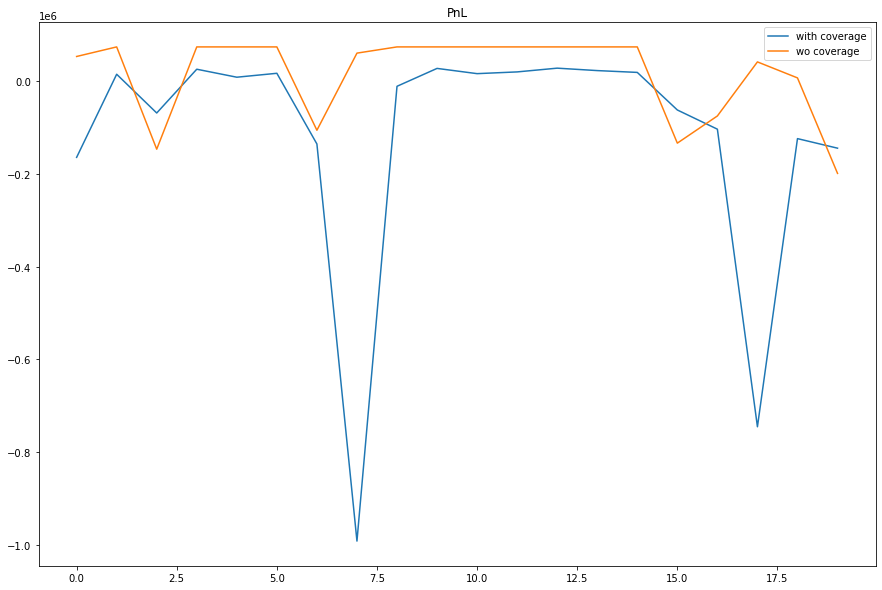

In [37]:
plt.figure(figsize = (15,10))
plt.plot(pnl_covered)
plt.plot(pnl_wo_cov)
plt.legend(['with coverage','wo coverage'])
plt.title('PnL')
plt.xlabel('trajectories')

In [38]:
df_compare = pd.DataFrame()
df_compare['sans couverture'] = pnl_wo_cov
df_compare['avec la couverture en delta'] = pnl_covered
df_compare = df_compare.rename_axis('Trajectories')
df_compare['Meilleur PNL en delta?'] = df_compare['avec la couverture en delta'] > df_compare['sans couverture']
df_compare

,sans couverture,avec la couverture en delta,Meilleur PNL en delta?
Trajectories,,,
0,53298.80,-164384.32,False
1,73951.80,14959.08,False
2,-146736.40,-68651.04,True
3,73951.80,25803.49,False
4,73951.80,8580.69,False
5,73951.80,17022.95,False
6,-105873.10,-135528.80,False
7,60544.85,-992356.10,False
8,73951.80,-11031.16,False


On remarque que la stratégie de couverture en deltas est dans notre cas moins avantageuse en moyenne. Cela peut être du aux frais de transactions appliqués dès qu'il y a des ventes/achats de titres, ce qui arrive à chaque étape. 


# Question 6: Calcul des titres à détenir à chaque étape et pour chaque trajectoire par l'approche de maximisation

In [39]:
mat_titre_max = np.zeros((nb_path, nb_step))

In [40]:
alpha1 = alpha2 = 0.01
ksi = 1 #Choisi abitrairement

for j in range(mat_titre_max.shape[0]):
    
    esp_c1 = (1/nb_path) * np.sum( mat_call_price[:,1] )
    esp_s1 = (1/nb_path) * np.sum( mat_path_spot_fut[:,1])
    maxi = - np.inf
    C0 = mat_call_price[j,0]
    S0 = mat_path_spot_fut[j,0]
    N0 = 1
    
    for n0 in range(1,N):
        
        esp = N * (C0 - esp_c1 ) + n0 * (esp_s1 - S0) + int_rate * time_step * ( N * C0 - psi(N, C0) - n0 * S0 - phi(n0 * S0) )
        
        if esp > maxi:
            
            N0 = n0
            maxi = esp
            
    mat_titre_max[j,0] = int(N0)
    
    
      
    b0 = N * C0 - psi(N, C0) - ( mat_titre_max[j,0] * S0 + phi(mat_titre_max[j,0] * S0))
    b1 = N * (C0 - mat_call_price[j,1]) + mat_titre_max[j,0] * (mat_path_spot_fut[j,1] - S0) + int_rate*time_step*b0
    bm = [b0, b1]
    
    for t in range(1,mat_titre_max.shape[1] - 1):
        
        proba = [np.exp( - ksi * np.abs(mat_path_spot_fut[l,t + 1] - mat_path_spot_fut[j,t + 1] )) for l in range(nb_path)]
        somme = np.sum(proba)
        proba = proba/somme
        
        esp_s = np.sum([s * p  for (s,p) in zip(mat_path_spot_fut[:,t + 1],proba)])
        esp_c = np.sum([c * p  for (c,p) in zip(mat_call_price[:,t + 1],proba)])
        
        S =  mat_path_spot_fut[j,t]
        
        maxi = -np.inf
        Nm = 1

        if esp_s - S == 0:
            
            maxi = -np.inf
            Nm = 1
            
            for k in range(1, N):
                
                if np.abs(bm[t] + (mat_titre_max[j,t-1] - k) * S - phi(np.abs((mat_titre_max[j,t-1] - k) * S)) ) <= alpha1 * S * mat_titre_max[j,t-1]:  
                
                    esp = -N * (esp_c - mat_call_price[j,t]) + k * (esp_s - S) + int_rate * time_step * (bm[t] + (mat_titre_max[j,t-1] - k) * S - phi(np.abs(mat_titre_max[j,t-1] - k) * S))

                    if esp > maxi :

                        maxi = esp
                        Nm = k

            mat_titre_max[j,t] = int(Nm)
            
        else:
            
            maxi = -np.inf
            Nm = 1
            
            for k in range(1,N):
                
                if np.abs(int_rate * time_step * bm[t] - N * (esp_c - mat_call_price[j,t]) + k * (esp_s - S)) <= alpha2 * N * mat_call_price[j,t]:
                
                    esp = -N * (esp_c - mat_call_price[j,t]) + k * (esp_s - S) + int_rate * time_step * (bm[t] + (mat_titre_max[j,t-1] - k) * S - phi(np.abs(mat_titre_max[j,t-1] - k) * S))

                    if esp > maxi :

                        maxi = esp

                        Nm = k

            mat_titre_max[j,t] = int(Nm)
        
        
        b = bm[t] + (mat_titre_max[j,t-1] - mat_titre_max[j,t])*mat_path_spot_fut[j,t] - phi(np.abs(mat_titre_max[j,t-1] - mat_titre_max[j,t])*mat_path_spot_fut[j,t])
        bm.append(N * (mat_call_price[j,t] - mat_call_price[j,t+1]) + mat_titre_max[j,t]  * (mat_path_spot_fut[j,t + 1] - mat_path_spot_fut[j,t]) + int_rate*time_step*b)

    proba = [np.exp( - ksi * np.abs(mat_path_spot_fut[l,-1] - mat_path_spot_fut[j,-1] )) / somme for l in range(nb_path)]
    somme = np.sum(proba)
    proba = proba / somme 
    
    esp_s = np.sum([s * p  for (s,p) in zip(mat_path_spot_fut[:,-1],proba)])
    esp_c = np.sum([c * p  for (c,p) in zip(mat_call_price[:,-1],proba)])
    
    maxi = - np.inf
    C = mat_call_price[j,-2]
    S = mat_path_spot_fut[j,-2]
    Nm = 1
    
    for n in range(1,N):
        
        esp_inf = np.sum([phi(n * mat_path_spot_fut[l,-1] ) * p if mat_path_spot_fut[l,-1] < strike else 0 for (l,p) in zip(range(nb_path),proba)])
        esp_sup = np.sum([phi(N * strike ) + (N - n) * mat_path_spot_fut[l,-1] + phi(mat_path_spot_fut[l,-1] * (N - n)) if mat_path_spot_fut[l,-1] > strike else 0 for (l,p) in zip(range(nb_path),proba)]) 
        
        esp = N * (C - esp_c) + n * (esp_s - S) + int_rate * time_step * (bm[-1] + (mat_titre_max[j,-2] - n) * mat_path_spot_fut[j,-1] - phi(np.abs(mat_titre_max[j,-2] - n) * mat_path_spot_fut[j,-1])) - esp_inf - esp_sup
        
        if esp > maxi:
            
            maxi = esp
            Nm = n
        
        mat_titre_max[j,-1] = int(Nm)

In [53]:
df_titre_max = pd.DataFrame(mat_titre_max)
np.round(df_titre_max).add_prefix('nb of title at t').set_index('trajectoire ' + df_titre_max.index.astype(str))

,nb of title at t0,nb of title at t1,nb of title at t2,nb of title at t3,nb of title at t4,nb of title at t5,nb of title at t6,nb of title at t7,nb of title at t8,nb of title at t9,nb of title at t10,nb of title at t11
trajectoire 0,1.0,8535.0,7531.0,3007.0,6362.0,1.0,7594.0,8730.0,8280.0,9794.0,1.0,9999.0
trajectoire 1,1.0,9793.0,8371.0,4180.0,365.0,1.0,1.0,1.0,1.0,1.0,1.0,9999.0
trajectoire 2,1.0,1.0,5819.0,8321.0,4747.0,3816.0,5445.0,6963.0,8111.0,8664.0,8925.0,9999.0
trajectoire 3,1.0,5908.0,1.0,6196.0,1.0,8702.0,3101.0,9334.0,3185.0,1.0,1.0,9999.0
trajectoire 4,1.0,4893.0,282.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9999.0
trajectoire 5,1.0,1.0,7936.0,9886.0,2422.0,1.0,1.0,1.0,1.0,1.0,1.0,9999.0
trajectoire 6,1.0,1.0,8035.0,1609.0,7980.0,7001.0,5847.0,8708.0,1.0,1.0,7734.0,9999.0
trajectoire 7,1.0,1.0,7112.0,6749.0,9506.0,1.0,7189.0,3446.0,5796.0,9095.0,3434.0,9999.0
trajectoire 8,1.0,5650.0,1.0,7236.0,5481.0,6125.0,1.0,7776.0,1841.0,1.0,1.0,9999.0
trajectoire 9,1.0,7854.0,7881.0,9611.0,8696.0,8901.0,1.0,9702.0,7062.0,1.0,1.0,9999.0


# Question 7: Calcul du PNL pour l'approche par maximisation

In [45]:
pnl_covered_max = pnl_cov(mat_call_price, mat_titre_max, mat_path_spot_fut, N, strike, int_rate, time_step, nb_path)
pnl_covered_max

array([ 83869.97,  35789.61,  59464.79,  59071.8 ,  69925.53,  67877.94,
        96965.76,  71904.64,  20789.68, 106448.37,  42787.86,  48804.64,
        12349.01, -36400.15,  -8434.66,  29463.59, 163646.54,  -5787.29,
       -33400.92,  -5762.88])

Text(0, 0.5, 'PNL in euros')

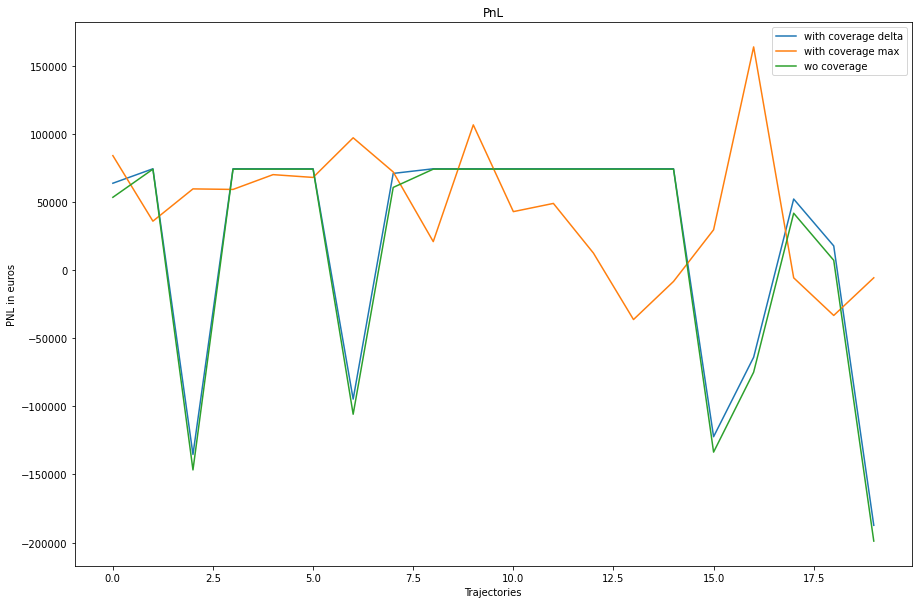

In [52]:
plt.figure(figsize = (15,10))
plt.plot(pnl_covered)
plt.plot(pnl_covered_max)
plt.plot(pnl_wo_cov)
plt.legend(['with coverage delta','with coverage max', 'wo coverage'])
plt.title('PnL')
plt.xlabel('Trajectories')
plt.ylabel('PNL in euros')

# Question 8: Tableau comparatif des PNL pour les différentes approches

In [48]:
df = pd.DataFrame()
df['PNL Delta'] = pnl_covered
df['PNL Maximisation'] = pnl_covered_max
df['PNL sans couverture'] = pnl_wo_cov
df = df.rename_axis('Trajectories')
df['Meilleur PNL en Delta vs Max ?'] = df['PNL Maximisation'] < df['PNL Delta']
df['Meilleur PNL en Delta vs sans couverture?'] = df['PNL sans couverture'] < df['PNL Delta']
df['Meilleur PNL en Max vs sans couverture?'] = df['PNL sans couverture'] < df['PNL Maximisation']
df

,PNL Delta,PNL Maximisation,PNL sans couverture,Meilleur PNL en Delta vs Max ?,Meilleur PNL en Delta vs sans couverture?,Meilleur PNL en Max vs sans couverture?
Trajectories,,,,,,
0,63619.3025,83869.97,53298.80,False,True,True
1,74223.3405,35789.61,73951.80,True,True,False
2,-135383.9375,59464.79,-146736.40,False,True,True
3,74226.4135,59071.80,73951.80,True,True,False
4,74220.1775,69925.53,73951.80,True,True,False
5,74224.2385,67877.94,73951.80,True,True,False
6,-94778.0945,96965.76,-105873.10,False,True,True
7,70825.3645,71904.64,60544.85,False,True,True
8,74216.9115,20789.68,73951.80,True,True,False
